In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [94]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [95]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [96]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [97]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [98]:
cat_cols = list(df.select_dtypes('O').columns)
num_cols = list(df.select_dtypes(['int64', 'float64']).columns)


In [99]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [100]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [101]:
df['embark'] = df['route'].apply(lambda x: x[:3])
df['disembark'] = df['route'].apply(lambda x: x[3:])
df.drop('route', axis=1, inplace=True)
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,embark,disembark
49995,2,Internet,RoundTrip,27,6,9,6,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,7,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,6,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,1,Australia,1,0,1,5.62,0,PER,PNH
49999,1,Internet,RoundTrip,19,6,10,4,Australia,0,1,0,5.62,0,PER,PNH


In [102]:
mapping = {"Internet": 1, "Mobile": 2}
df["sales_channel"] = df["sales_channel"].map(mapping)
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,embark,disembark
49995,2,1,RoundTrip,27,6,9,6,Australia,1,0,1,5.62,0,PER,PNH
49996,1,1,RoundTrip,111,6,4,7,Australia,0,0,0,5.62,0,PER,PNH
49997,1,1,RoundTrip,24,6,22,6,Australia,0,0,1,5.62,0,PER,PNH
49998,1,1,RoundTrip,15,6,11,1,Australia,1,0,1,5.62,0,PER,PNH
49999,1,1,RoundTrip,19,6,10,4,Australia,0,1,0,5.62,0,PER,PNH


In [103]:
mapping = {"RoundTrip": 1, "CircleTrip": 2, "OneWay":3}
df["trip_type"] = df["trip_type"].map(mapping)
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,embark,disembark
49995,2,1,1,27,6,9,6,Australia,1,0,1,5.62,0,PER,PNH
49996,1,1,1,111,6,4,7,Australia,0,0,0,5.62,0,PER,PNH
49997,1,1,1,24,6,22,6,Australia,0,0,1,5.62,0,PER,PNH
49998,1,1,1,15,6,11,1,Australia,1,0,1,5.62,0,PER,PNH
49999,1,1,1,19,6,10,4,Australia,0,1,0,5.62,0,PER,PNH


In [104]:
df['booking_origin'] = df['booking_origin'].replace(to_replace='(not set)', value='Missing')
df.tail(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,embark,disembark
49980,4,1,1,242,6,9,2,Malaysia,1,0,1,5.00,1,PEN,XIY
49981,1,1,1,317,6,1,4,Malaysia,1,0,1,5.00,0,PEN,XIY
49982,2,1,1,177,6,8,4,Malaysia,1,1,0,5.00,0,PEN,XIY
49983,1,1,1,112,6,17,2,Australia,0,0,1,5.62,0,PER,PNH
49984,2,1,1,7,6,4,3,Australia,0,0,0,5.62,1,PER,PNH
49985,1,1,1,26,6,13,3,Australia,1,1,1,5.62,0,PER,PNH
49986,1,1,1,94,6,19,6,Australia,0,0,0,5.62,0,PER,PNH
49987,3,1,1,243,6,12,5,Australia,1,0,1,5.62,1,PER,PNH
49988,1,1,1,6,6,14,4,Australia,1,1,1,5.62,0,PER,PNH
49989,1,1,1,33,6,2,6,Cambodia,1,0,0,5.62,0,PER,PNH


In [109]:
cat_cols


['booking_origin', 'embark', 'disembark']

In [106]:
for col in cat_cols:
    df[col + '_codes'], _ = df[col].factorize()
    df.drop(col, axis=1, inplace=True)

In [107]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


In [108]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_codes,embark_codes,disembark_codes
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0,0,0
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0,0,0
2,2,1,1,243,22,17,3,1,1,0,5.52,0,1,0,0
3,1,1,1,96,31,4,6,0,0,1,5.52,0,0,0,0
4,2,1,1,68,22,15,3,1,0,1,5.52,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0,36,66,31
49996,1,1,1,111,6,4,7,0,0,0,5.62,0,36,66,31
49997,1,1,1,24,6,22,6,0,0,1,5.62,0,36,66,31
49998,1,1,1,15,6,11,1,1,0,1,5.62,0,36,66,31


In [110]:
from sklearn.model_selection import train_test_split


In [111]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.4, random_state=1)

In [112]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = RobustScaler()

In [113]:
X_train_scaled = scaler.fit_transform(X_train)

In [114]:
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [115]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [116]:
rfc = RandomForestClassifier(random_state=1)

In [117]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
rfc_pred = rfc.predict(X_val_scaled)
confusion_matrix(rfc_pred, y_val)


array([[10009,  1646],
       [  168,   177]], dtype=int64)

In [121]:
print(classification_report(rfc_pred, y_val))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     11655
           1       0.10      0.51      0.16       345

    accuracy                           0.85     12000
   macro avg       0.54      0.69      0.54     12000
weighted avg       0.96      0.85      0.90     12000



In [122]:
data = {'feature': X.columns, 'Importance': rfc.feature_importances_*100}
feat_importance = pd.DataFrame(data=data).sort_values(by='Importance', ascending=False)

In [123]:
feat_importance

,feature,Importance
3,purchase_lead,18.522365
5,flight_hour,13.803931
4,length_of_stay,12.441443
11,booking_origin_codes,10.377579
12,embark_codes,9.545771
6,flight_day,9.135818
13,disembark_codes,7.769213
10,flight_duration,5.954188
0,num_passengers,4.828234
9,wants_in_flight_meals,2.311909


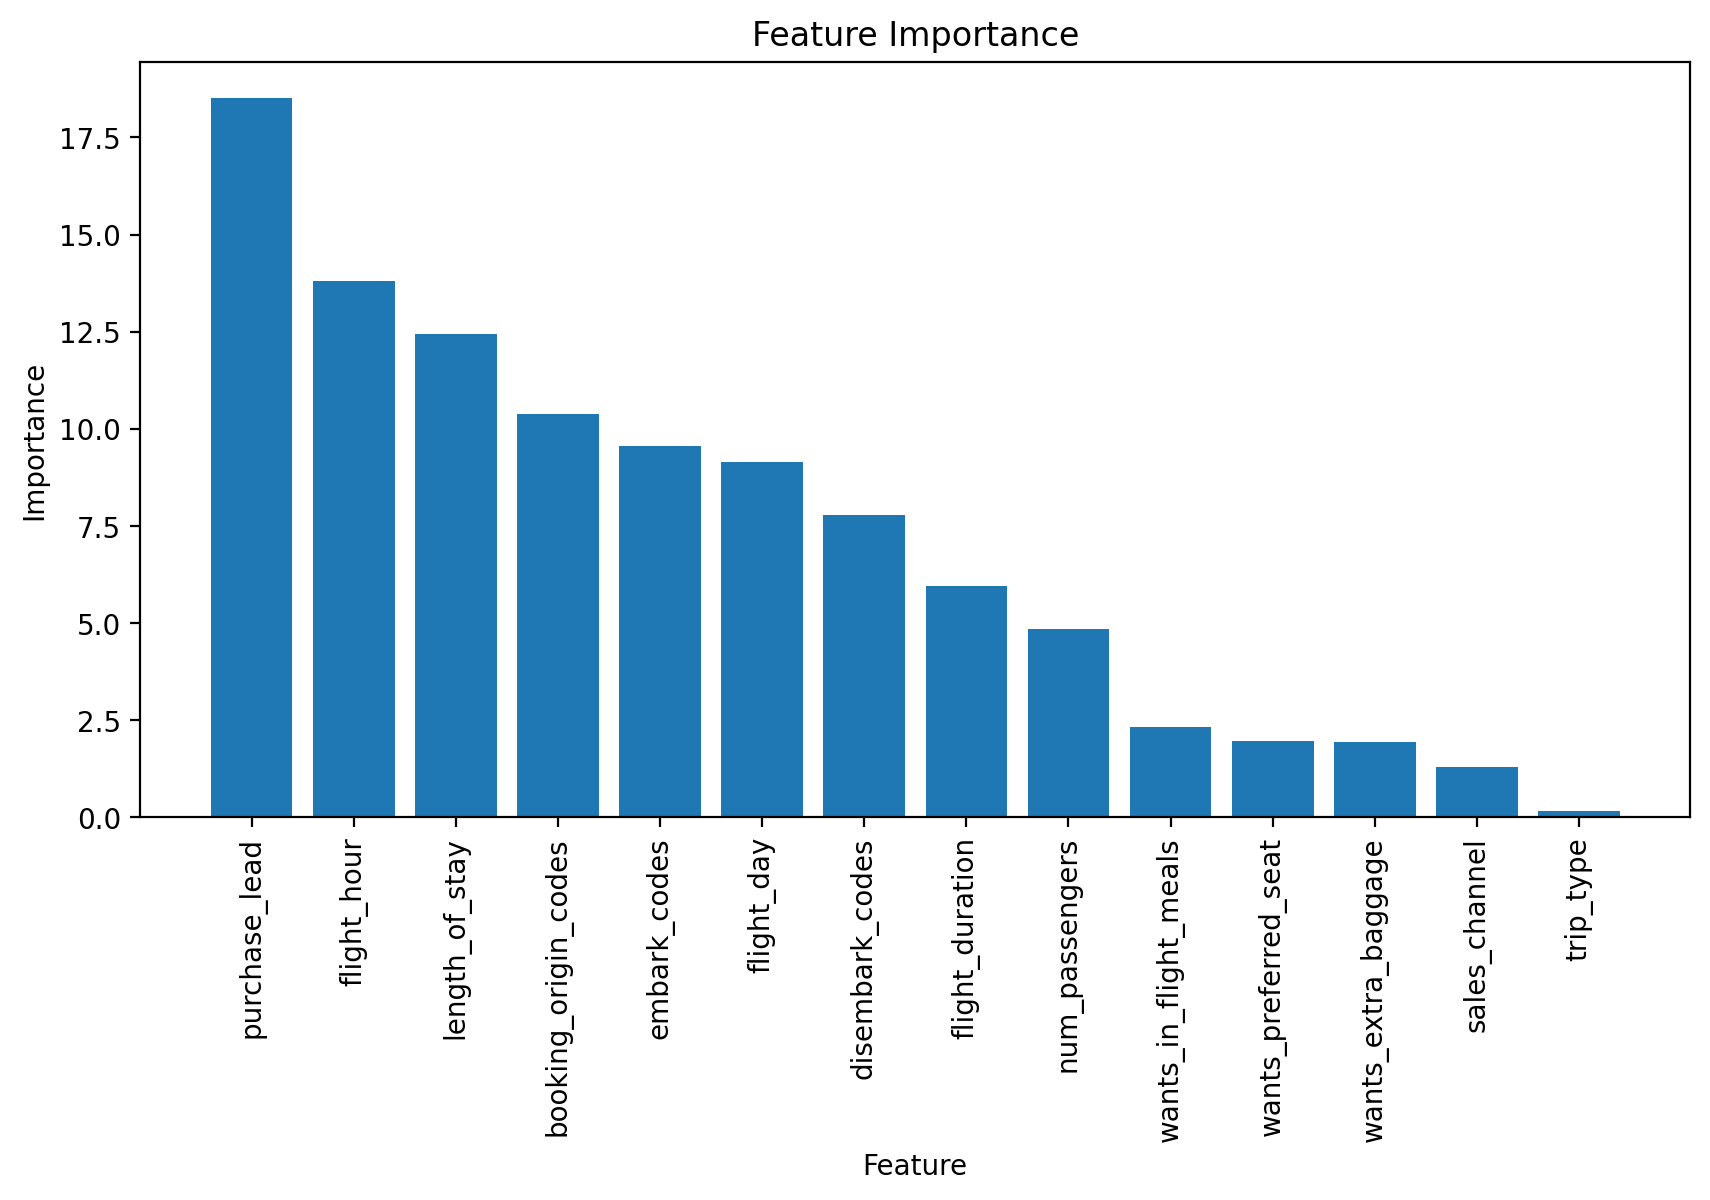

<Figure size 432x288 with 0 Axes>

In [125]:
plt.figure(figsize=(10,5), dpi=200)
plt.bar(np.arange(len(feat_importance)), feat_importance['Importance'])
plt.xticks(np.arange(len(feat_importance)), feat_importance['feature'], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importance')
plt.show()
plt.savefig('feature_importance')